### Author: Hoang Chu

### Imports

In [1036]:
%pip install -r dependencies.txt

Note: you may need to restart the kernel to use updated packages.


In [1037]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import requests
import scipy

In [1038]:
import importlib
import helper, consts

In [1039]:
importlib.reload(consts)
importlib.reload(helper)

<module 'helper' from '/Users/hoangchu/Documents/Clinic/code/helper.py'>

### CONSTANTS

In [1040]:
ROW_AX = 0
COL_AX = 1

In [1041]:
DATA_PATH = consts.DATA_PATH
DATA_PATH

'../data/'

In [1042]:
RESPONSE_NAME = "rrirpnxm_nt_0"

### Quick Functions

In [1043]:
does_sub_df_has_Nan = lambda df, col_name: df[[col_name]].isna().any(axis=COL_AX)

### Feature Selection

##### Read the data

In [1044]:
# local read

data_20191202_1200_df = pd.read_csv(DATA_PATH + "data_20191202_1200.csv")
data_20191203_1200_df = pd.read_csv(DATA_PATH + "data_20191203_1200.csv")

In [1045]:
# cloud read -- TODO: NEED A PERMANENT LINK!!

# importlib.reload(consts)

# url = ... # url in consts.py
# assert requests.get(url).status_code == 200
# data_20191202_1200_df = pd.read_csv(url)
# data_20191202_1200_df.head()

##### Preliminary check

In [1046]:
data_20191202_1200_df.shape

(2910, 252)

In [1047]:
data_20191203_1200_df.shape

(2915, 252)

In [1048]:
print(f"20191202:")
data_20191202_1200_df.info()
print(f"Columns with NaN: {data_20191202_1200_df[data_20191202_1200_df.isna().any(axis=COL_AX)]}")

print()

print(f"20191203:")
data_20191203_1200_df.info()
print(f"Columns with NaN: {data_20191203_1200_df[data_20191203_1200_df.isna().any(axis=COL_AX)]}")

20191202:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Columns: 252 entries, eqid to tr_toxhr_0
dtypes: float64(251), int64(1)
memory usage: 5.6 MB
Columns with NaN: Empty DataFrame
Columns: [eqid, wt, today, tonight, tmwam, dn3sttmwmd, dn1, dn4x1, cftorrrelstd_open_0, liqlog_open_0, llirpnxm_am_1, llirpnxm_dy_12to16, llirpnxm_dy_17to21, llirpnxm_dy_1to3, llirpnxm_dy_4to6, llirpnxm_dy_7to11, llirpnxm_lst15_0, llirpnxm_lsthrx15_0, llirpnxm_md_1, llirpnxm_nt_0, llirpnxm_nt_1, llirpnxm_nt_12to16, llirpnxm_nt_17to21, llirpnxm_nt_1to3, llirpnxm_nt_4to6, llirpnxm_nt_7to11, llirpnxm_pm_1, llirpnxm_toxhr_0, mocrelvol_open_1, mocrelvol_open_13to17, mocrelvol_open_18to22, mocrelvol_open_2to4, mocrelvol_open_5to7, mocrelvol_open_8to12, momr10d_open_0, momr50dx10d_open_0, moorelvol_open_0, moorelvol_open_12to16, moorelvol_open_17to21, moorelvol_open_1to3, moorelvol_open_4to6, moorelvol_open_7to11, nnetticksrelmultstdev_am_1, nnetticksrelmultstdev_dy_12to16, nnetticksre

In [1049]:
print(f"20191202 - unique eqid count: {data_20191202_1200_df.eqid.nunique()}")
print(f"20191203 - unique eqid count: {data_20191203_1200_df.eqid.nunique()}")

20191202 - unique eqid count: 2910
20191203 - unique eqid count: 2915


In [1050]:
data_20191202_1200_df.drop('eqid', axis=COL_AX, inplace=True)
data_20191203_1200_df.drop('eqid', axis=COL_AX, inplace=True)

In [1051]:
print(f"20191202:")
data_20191202_1200_df.describe().loc[['min', 'max']]

20191202:


,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,llirpnxm_am_1,...,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_pm_1,tr_toxhr_0
min,0.000017,-0.056959,-0.074278,-0.057647,-0.172408,-0.160248,-0.211938,-1.842923,-3.395071,-0.011349,...,-0.024689,-0.101875,-0.041802,-0.224477,-0.253916,-0.248580,-0.182809,-0.226581,0.0,-0.027905
max,0.001446,0.051399,0.064996,0.055767,0.239135,0.099030,0.222372,2.024149,1.571073,0.007322,...,0.064105,0.068691,0.102588,0.254516,0.278915,0.327063,0.174921,0.269118,0.0,0.018218


In [1052]:
print(f"20191203:")
data_20191203_1200_df.describe().loc[['min', 'max']]

20191203:


,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,llirpnxm_am_1,...,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_pm_1,tr_toxhr_0
min,0.000017,-0.048435,-0.046199,-0.047159,-0.194887,-0.114078,-0.188259,-1.855363,-3.389490,-0.008491,...,-0.112965,-0.23746,-0.101875,-0.226581,-0.253916,-0.248580,-0.203380,-0.194633,-0.036342,-0.070831
max,0.001440,0.046834,0.074337,0.055817,0.259849,0.106556,0.251362,2.036582,1.573204,0.028806,...,0.057098,0.23246,0.068691,0.254516,0.278915,0.327063,0.174921,0.269118,0.076588,0.104314


##### Get the responses columns

In [1053]:
training_responses = data_20191202_1200_df[RESPONSE_NAME]
actual_responses = data_20191203_1200_df[RESPONSE_NAME]

##### 20191202_1200 data

In [1054]:
data_20191202_1200_df.drop(RESPONSE_NAME, axis=COL_AX, inplace=True)

In [1055]:
data_20191202_1200_df.corr().isna().sum()

wt              16
today           16
tonight         16
tmwam           16
dn3sttmwmd      16
              ... 
tr_nt_1to3      16
tr_nt_4to6      16
tr_nt_7to11     16
tr_pm_1        250
tr_toxhr_0      16
Length: 250, dtype: int64

Some column pairs have NaN correlations, meaning either or both columns have constant values in all rows.

In [1056]:
# Get columns where all rows have the same value
constVal_columns = data_20191202_1200_df.columns[data_20191202_1200_df.apply(lambda x: x.nunique() == 1)]
constVal_columns

Index(['llirpnxm_pm_1', 'nnetticksrelrrsign_pm_1', 'nsameticksrelrrsign_pm_1',
       'rel2retcfrtxm_pm_1', 'relntrds70tr_pm_1', 'relvol_pm_1',
       'rrirpnxm_pm_1', 'rrretstr_pm_1', 'rvdelta_nt_0', 'rvdelta_nt_1',
       'rvdelta_nt_12to16', 'rvdelta_nt_17to21', 'rvdelta_nt_1to3',
       'rvdelta_nt_4to6', 'rvdelta_nt_7to11', 'tr_pm_1'],
      dtype='object')

In [1057]:
TOBE_REMOVED_20191202_1200_COLUMNS = list(constVal_columns)

##### 20191203_1200 data

In [1058]:
data_20191203_1200_df.drop(RESPONSE_NAME, axis=COL_AX, inplace=True)

In [1059]:
data_20191203_1200_df.corr().isna().sum()

wt             7
today          7
tonight        7
tmwam          7
dn3sttmwmd     7
              ..
tr_nt_1to3     7
tr_nt_4to6     7
tr_nt_7to11    7
tr_pm_1        7
tr_toxhr_0     7
Length: 250, dtype: int64

In [1060]:
# Get columns where all rows have the same value
constVal_columns = data_20191203_1200_df.columns[data_20191203_1200_df.apply(lambda x: x.nunique() == 1)]
constVal_columns

Index(['rvdelta_nt_0', 'rvdelta_nt_1', 'rvdelta_nt_12to16',
       'rvdelta_nt_17to21', 'rvdelta_nt_1to3', 'rvdelta_nt_4to6',
       'rvdelta_nt_7to11'],
      dtype='object')

In [1061]:
TOBE_REMOVED_20191203_1200_COLUMNS = list(constVal_columns)

##### Get training_predictors_df and testing_predictors_df

In [1062]:
TOBE_REMOVED_20191202_1200_COLUMNS_set = set(TOBE_REMOVED_20191202_1200_COLUMNS)
TOBE_REMOVED_20191203_1200_COLUMNS_set = set(TOBE_REMOVED_20191203_1200_COLUMNS)

In [1063]:
# Appear in TOBE_REMOVED_20191202_1200_COLUMNS_set but not in TOBE_REMOVED_20191203_1200_COLUMNS_set
print(TOBE_REMOVED_20191202_1200_COLUMNS_set - TOBE_REMOVED_20191203_1200_COLUMNS_set)

{'relntrds70tr_pm_1', 'rel2retcfrtxm_pm_1', 'tr_pm_1', 'rrretstr_pm_1', 'llirpnxm_pm_1', 'rrirpnxm_pm_1', 'nnetticksrelrrsign_pm_1', 'relvol_pm_1', 'nsameticksrelrrsign_pm_1'}


In [1064]:
# Appear in TOBE_REMOVED_20191203_1200_COLUMNS_set but not in TOBE_REMOVED_20191202_1200_COLUMNS_set
print(TOBE_REMOVED_20191203_1200_COLUMNS_set - TOBE_REMOVED_20191202_1200_COLUMNS_set)

set()


In [1065]:
remove_20191202_stay_20191203_columns = list(TOBE_REMOVED_20191202_1200_COLUMNS_set - TOBE_REMOVED_20191203_1200_COLUMNS_set)
data_20191203_1200_df[remove_20191202_stay_20191203_columns].describe()

,relntrds70tr_pm_1,rel2retcfrtxm_pm_1,tr_pm_1,rrretstr_pm_1,llirpnxm_pm_1,rrirpnxm_pm_1,nnetticksrelrrsign_pm_1,relvol_pm_1,nsameticksrelrrsign_pm_1
count,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000
mean,0.214640,-0.059021,0.000131,0.095466,0.000175,0.000436,0.627612,0.065292,0.028928
std,0.447390,0.930332,0.002753,1.057441,0.001472,0.006924,1.188236,1.079654,1.113209
min,0.000000,-0.500970,-0.036342,-1.218756,-0.006140,-0.043686,-3.927740,-2.443879,-3.323509
25%,0.000000,-0.442924,0.000000,-0.731324,-0.000595,-0.002610,-0.009547,-0.649976,-0.688276
50%,0.000000,-0.344290,0.000000,-0.150509,0.000070,0.000349,0.399108,0.087055,0.002476
75%,0.177726,-0.128492,0.000000,0.646861,0.000834,0.003216,1.151167,0.768064,0.739804
max,1.886239,4.907223,0.076588,3.080527,0.006773,0.040949,3.927740,2.534253,3.323509


In [1066]:
TOBE_REMOVED_COLUMNS = TOBE_REMOVED_20191202_1200_COLUMNS

Since there are variances among those columns, I don't think removing them now benefits the model.

In [1067]:
data_20191202_1200_working_df = data_20191202_1200_df.drop(TOBE_REMOVED_COLUMNS, axis=COL_AX)
data_20191203_1200_working_df = data_20191203_1200_df.drop(TOBE_REMOVED_COLUMNS, axis=COL_AX)

In [1068]:
print(f"1% negative correlations ranking: {sorted(data_20191202_1200_working_df.corr().quantile(0.1), reverse=True)}")
print(f"99% negative correlations ranking: {sorted(data_20191202_1200_working_df.corr().quantile(0.9), reverse=True)}")
data_20191202_1200_working_df.corr().describe()

1% negative correlations ranking: [-0.015723667854274332, -0.01967741806603435, -0.021203385402303786, -0.021413152371616444, -0.02155093833759964, -0.02163836569382537, -0.0225021571181047, -0.023071468117029016, -0.023159152657865233, -0.023343377095125212, -0.024276931578257655, -0.024563188978388006, -0.024772137823252095, -0.025041693281809503, -0.02538873260800942, -0.02543909304220645, -0.025811205027254026, -0.025859209450777163, -0.02613362039644677, -0.026339799041727344, -0.026365889998957785, -0.02668191985665629, -0.02671561230328029, -0.026768288418984466, -0.02695185501129509, -0.02715859076413078, -0.02723038638732873, -0.027483550343591456, -0.027947132473239468, -0.028431035353004796, -0.028478755473706305, -0.028867693631344223, -0.02972504590497117, -0.029755800544625198, -0.030299537481567024, -0.03057411824865919, -0.03100852071432065, -0.031021869146968445, -0.03145165486231989, -0.031720495831337445, -0.031727643085943086, -0.031793887370124306, -0.0319786813124

,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,llirpnxm_am_1,...,tr_lsthrx15_0,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_toxhr_0
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,...,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,0.005605,0.010243,0.004902,0.012930,-0.009600,0.017133,-0.011608,0.000806,-0.000977,0.016243,...,-0.000578,0.028329,0.021589,0.043115,0.001498,0.007794,0.021698,0.016670,0.007666,0.001119
std,0.142153,0.082554,0.090547,0.075742,0.102808,0.101470,0.104703,0.135452,0.147653,0.094654,...,0.085847,0.085189,0.076074,0.100692,0.079447,0.076603,0.084620,0.076567,0.077065,0.076330
min,-0.331089,-0.135888,-0.176162,-0.054034,-0.147176,-0.205854,-0.205854,-0.573587,-0.326894,-0.114293,...,-0.397774,-0.112370,-0.106328,-0.108571,-0.077013,-0.070064,-0.088120,-0.066021,-0.065866,-0.110248
25%,-0.053518,-0.017335,-0.024882,-0.010458,-0.045984,-0.017772,-0.049423,-0.069602,-0.067511,-0.022396,...,-0.024177,-0.012194,-0.004275,-0.009028,-0.024033,-0.012684,-0.008993,-0.008473,-0.015112,-0.020682
50%,-0.007554,0.005396,0.002039,0.007041,-0.015835,0.008598,-0.018656,-0.015880,-0.006874,0.004661,...,-0.003207,0.014824,0.015916,0.023563,-0.008635,-0.000070,0.008212,0.006469,-0.000312,-0.001980
75%,0.054009,0.027448,0.024110,0.024353,0.009747,0.037713,0.008564,0.046785,0.063204,0.036062,...,0.013661,0.051530,0.035576,0.066557,0.010156,0.014114,0.030966,0.027635,0.015052,0.011589
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1069]:
training_predictors_df = data_20191202_1200_working_df.copy()
testing_predictors_df = data_20191203_1200_working_df.copy()

In [1070]:
sorted(training_predictors_df.quantile(0.25) / training_predictors_df.quantile(0.01), reverse=True)[:2]

[3.5999999999999996, 0.6732191627416693]

In [1071]:
sorted(training_predictors_df.quantile(0.99) / training_predictors_df.quantile(0.75), reverse=True)[:2]

[45.058525418022505, 40.858359303391275]

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   2.,   0.,   1.,   1.,   0.,   1.,
          0.,   1.,   2.,   0.,   3.,   1.,   3.,   0.,   4.,   1.,   2.,
          2.,   4.,   6.,   8.,  10.,  12.,   5.,  12.,  18.,  20.,  26.,
         28.,  45.,  40.,  62.,  72.,  88., 126., 129., 173., 216., 229.,
        262., 242., 186., 165., 136., 120.,  75.,  73.,  44.,  35.,  37.,
         33.,  17.,  18.,  18.,   8.,   5.,   8.,   6.,  13.,   5.,   6.,
          7.,   3.,   4.,   5.,   6.,   3.,   0.,   1.,   1.,   1.,   1.,
          0.,   2.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,
          2.]),
 array([-6.563500e-02, -6.446313e-02, -6.329126e-02, -6.211939e-02,
        -6.094752e-02, -5.977565e-02, -5.860378e-02, -5.743191e-02,
        -5.626004e-02, -5.508817e-02, -5.391630e-02, -5.274443e-02,
        -5.157256e-02, -5.040069e-02, -4.922882e-02, -4.805695e-02,
        -4.688508e-02, -4.571321e-02, -4.45413

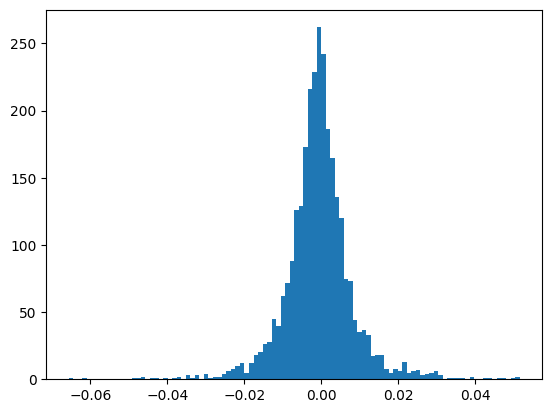

In [1072]:
plt.hist(training_responses, bins=100)

### Feature Selection

#### Interacting Terms

In [1073]:
col_pairs = [
    ['relvol_lsthrx15_0', 'rrirpnxm_lst15_0'],
    ["rvdelta_toxhr_0", "rrirpnxm_toxhr_0"],
    ["rvdelta_am_1", "rrirpnxm_am_1"],
    ["rvdelta_md_1", "rrirpnxm_md_1"],
    ["rvdelta_pm_1", "rrirpnxm_pm_1"],
    ["rvdelta_nt_1", "rrirpnxm_nt_1"],
    ["rvdelta_dy_1to3", "rrirpnxm_dy_1to3"],
    ["rvdelta_nt_1to3", "rrirpnxm_1to3"],
    ["rvdelta_dy_4to6", "rrirpnxm_4to6"],
    ["rvdelta_nt_4to6", "rrirpnxm_nt_4to6"],
    ["rvdelta_dy_7to11", "rrirpnxm_dy_7to11"],
    ["rvdelta_nt_7to11", "rrirpnxm_nt_7to11"],
    ["rvdelta_dy_12to16", "rrirpnxm_dy_12to16"],
    ["rvdelta_nt_12to16", "rrirpnxm_nt_12to16"],
    ["rvdelta_dy_17to21", "rrirpnxm_dy_17to21"],
    ["rvdelta_nt_17to21", "rrirpnxm_nt_17to21"]
]

In [1074]:
importlib.reload(helper)

training_predictors_df = helper.get_df_with_interaction_terms(training_predictors_df, col_pairs)
testing_predictors_df = helper.get_df_with_interaction_terms(testing_predictors_df, col_pairs)

#### Detect influential points

I will use Mahalanobis distance, which computes distances from the data's centre and create an oval boundary.

In [1075]:
mean_vector = np.mean(training_predictors_df, axis=0)
cov_matrix = np.cov(training_predictors_df, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [1076]:
mahalanobis_distances = []
for index, row in training_predictors_df.iterrows():
    mahalanobis_distance = scipy.spatial.distance.mahalanobis(row, mean_vector, inv_cov_matrix)
    mahalanobis_distances.append(mahalanobis_distance)

In [1077]:
training_predictors_df['mahalanobis_dist'] = mahalanobis_distances
training_predictors_df.head()

,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,llirpnxm_am_1,...,tr_toxhr_0,"(relvol_lsthrx15_0, rrirpnxm_lst15_0)","(rvdelta_toxhr_0, rrirpnxm_toxhr_0)","(rvdelta_am_1, rrirpnxm_am_1)","(rvdelta_md_1, rrirpnxm_md_1)","(rvdelta_dy_1to3, rrirpnxm_dy_1to3)","(rvdelta_dy_7to11, rrirpnxm_dy_7to11)","(rvdelta_dy_12to16, rrirpnxm_dy_12to16)","(rvdelta_dy_17to21, rrirpnxm_dy_17to21)",mahalanobis_dist
0,0.000594,-0.016720,-0.015436,-0.002487,0.011511,-0.038052,0.025530,0.231635,-0.065247,0.002597,...,0.0,0.000080,-0.000133,-0.000811,-0.001555,-0.017613,-0.010204,0.331146,0.041209,11.052465
1,0.001446,0.001475,-0.007683,-0.001346,0.027832,-0.006712,0.029269,-0.482915,1.571073,-0.000055,...,0.0,-0.000422,0.002590,0.000054,-0.001665,0.004569,0.022789,-0.090617,-0.225369,10.942768
2,0.000069,-0.019774,-0.013203,-0.003210,-0.001507,-0.040861,0.005203,0.165615,-2.223915,0.000659,...,0.0,-0.001654,0.002669,-0.000824,0.000496,0.091617,0.006973,-0.156873,0.020789,11.992135
3,0.000120,-0.000934,-0.002772,-0.000651,0.005818,-0.004393,0.006443,-1.229984,-1.670970,-0.000372,...,0.0,0.000061,0.001615,-0.007456,-0.000897,-0.004703,0.091796,0.235434,-0.110737,11.785516
4,0.000892,0.004249,0.002662,-0.000931,-0.034163,0.007955,-0.037853,-1.326470,0.342333,-0.000857,...,0.0,-0.003560,0.004976,0.003221,-0.001162,-0.056485,0.008382,-0.095880,-0.274977,14.884482


In [1078]:
#TODO: Need discussion
mahal_threshold = 3 # Typical 'mahal_threshold' is 3
outlier_significance_val = .001

In [1079]:
training_predictors_df['mahal_p_value'] = 1 - scipy.stats.chi2.cdf(training_predictors_df['mahalanobis_dist'], mahal_threshold)

In [1080]:
outlier_condition = (training_predictors_df['mahal_p_value'] < outlier_significance_val)

In [1081]:
nonOutlier_indices = training_predictors_df[~outlier_condition].index

In [1082]:
temp_col = 'response'
training_predictors_df[temp_col] = training_responses

training_predictors_df = training_predictors_df[~outlier_condition]

training_responses = training_predictors_df[temp_col]
training_predictors_df.drop(temp_col, axis=COL_AX, inplace=True)

In [1083]:
training_predictors_df.drop(['mahalanobis_dist', 'mahal_p_value'], axis = COL_AX, inplace=True)
training_predictors_df.reset_index(drop=True)
training_predictors_df.head()

,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,llirpnxm_am_1,...,tr_nt_7to11,tr_toxhr_0,"(relvol_lsthrx15_0, rrirpnxm_lst15_0)","(rvdelta_toxhr_0, rrirpnxm_toxhr_0)","(rvdelta_am_1, rrirpnxm_am_1)","(rvdelta_md_1, rrirpnxm_md_1)","(rvdelta_dy_1to3, rrirpnxm_dy_1to3)","(rvdelta_dy_7to11, rrirpnxm_dy_7to11)","(rvdelta_dy_12to16, rrirpnxm_dy_12to16)","(rvdelta_dy_17to21, rrirpnxm_dy_17to21)"
0,0.000594,-0.016720,-0.015436,-0.002487,0.011511,-0.038052,0.025530,0.231635,-0.065247,0.002597,...,0.000000,0.0,0.000080,-0.000133,-0.000811,-0.001555,-0.017613,-0.010204,0.331146,0.041209
1,0.001446,0.001475,-0.007683,-0.001346,0.027832,-0.006712,0.029269,-0.482915,1.571073,-0.000055,...,0.000000,0.0,-0.000422,0.002590,0.000054,-0.001665,0.004569,0.022789,-0.090617,-0.225369
2,0.000069,-0.019774,-0.013203,-0.003210,-0.001507,-0.040861,0.005203,0.165615,-2.223915,0.000659,...,0.000000,0.0,-0.001654,0.002669,-0.000824,0.000496,0.091617,0.006973,-0.156873,0.020789
3,0.000120,-0.000934,-0.002772,-0.000651,0.005818,-0.004393,0.006443,-1.229984,-1.670970,-0.000372,...,0.000000,0.0,0.000061,0.001615,-0.007456,-0.000897,-0.004703,0.091796,0.235434,-0.110737
4,0.000892,0.004249,0.002662,-0.000931,-0.034163,0.007955,-0.037853,-1.326470,0.342333,-0.000857,...,-0.055974,0.0,-0.003560,0.004976,0.003221,-0.001162,-0.056485,0.008382,-0.095880,-0.274977


#### If needed, transform the data

In [1084]:
# TODO: SIGNIFICANT ERROR IN LATER PART IF YOU DO THIS:

# temp_training_predictors_df = training_predictors_df + np.ceil(abs(sorted(training_predictors_df.min())[0]))
# training_predictors_df = np.log(temp_training_predictors_df)
# print(sorted(temp_training_predictors_df.min())[:5])
# temp_training_predictors_df.head()

#### PCA

### Build a multiple linear regression model

#### Forward selection with hypothesis testing

In [1085]:
df = training_predictors_df.copy()
X = df.copy()

selected_features = []
model = sklearn.linear_model.LinearRegression()

def calculate_f_ratio(X, y, feature):
    X = X[[feature]]
    f_values, p_values = sklearn.feature_selection.f_regression(X, y)
    return f_values[0]

f_ratios = []
threshold = 0.05
while len(X.columns) > 0:
    best_feature = None
    best_f_ratio = 0

    for feature in X.columns:
        f_ratio = calculate_f_ratio(X, training_responses, feature)
        if f_ratio > best_f_ratio:
            best_feature = feature
            best_f_ratio = f_ratio

    if best_feature is not None and best_f_ratio > threshold:
        selected_features.append(best_feature)
        X = X.drop(columns=[best_feature])
        model.fit(df[selected_features], training_responses)

    else:
        break

len(selected_features)

200

In [1086]:
training_predictors_df = training_predictors_df[selected_features]
testing_predictors_df = testing_predictors_df[selected_features]

#### LASSO

In [1087]:
import sklearn.linear_model

multiple_linreg = sklearn.linear_model.LassoCV(cv=10) # Higher cv, Lower bias
multiple_linreg.fit(training_predictors_df, training_responses)
len(list(filter(lambda x: x != 0, multiple_linreg.coef_)))

127

In [1088]:
# Since LASSO's penalty term is a function of abs(beta), the resulting beta(s) are non-negative.
positive_beta_indices = np.nonzero(multiple_linreg.coef_)[0]
print(len(positive_beta_indices))

127


#### Make predictions

In [1089]:
predicted_responses = multiple_linreg.predict(testing_predictors_df)

#### Model evaluation

In [1090]:
from sklearn.metrics import mean_squared_error, r2_score

In [1091]:
mse = mean_squared_error(actual_responses, predicted_responses)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.102308497554608e-05


In [1092]:
# Higher better. 1 is perfect prediction
r_squared = r2_score(actual_responses, predicted_responses)
print(f"R-Squared: {r_squared}")

R-Squared: 0.5543302648424026


In [1093]:
residuals = actual_responses - predicted_responses

##### Estimate covariance matrix of residuals

#### Check linear regression assumptions

##### Residuals must be normally distributed w/ Q-Q plot

Shapiro-Wilk Test: Residuals NOT normally distributed.


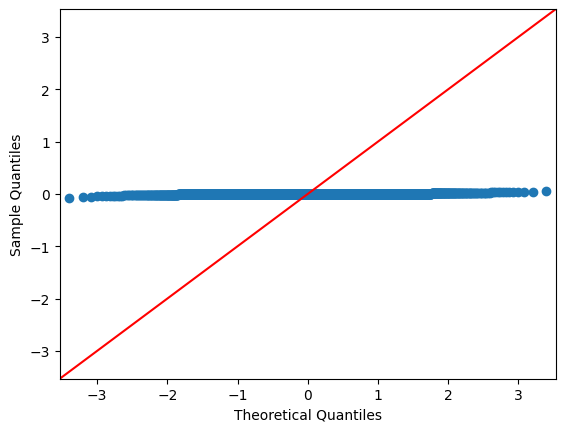

In [1094]:
import statsmodels.api as sm
helper.shapiro_test(residuals)
sm.qqplot(np.array(residuals), line = '45'); # A semicolon to avoid 2 similar plots -- this has been the library's bug for 5 years!

##### Mean of residuals should be 0

In [1095]:
np.mean(residuals)

-0.0007589519145104745

##### Check for multi-collinearity

In [1096]:
helper.vif_test(r_squared)

VIF = 2.2438140199185406. Some dependent predictors exist.


##### Residuals have a fixed variance

Breusch-Pagan Test: Residuals have constant variance.


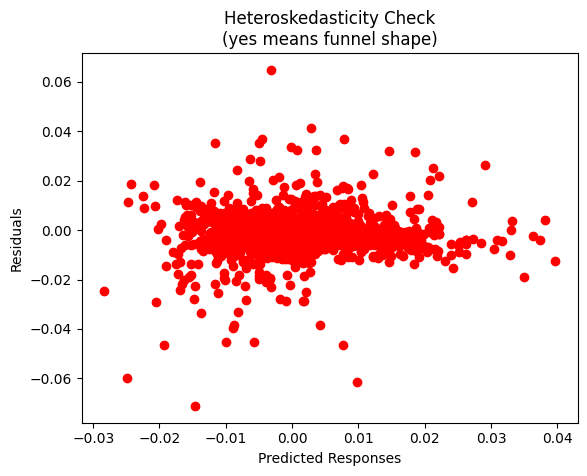

In [1097]:
# White test if only use 1 predictor (simple linear regression)
# for multiple linear regression, use bp-test

helper.bp_test(residuals, testing_predictors_df)

plt.scatter(x=predicted_responses, y = residuals, color = 'r')  # Replace X[:, 0] with the desired predictor variable
plt.xlabel('Predicted Responses')  # Replace 'X' with the label of the predictor variable
plt.ylabel('Residuals')
plt.title('Heteroskedasticity Check\n(yes means funnel shape)')
plt.show()

In [1098]:
%pip freeze > dependencies.txt

Note: you may need to restart the kernel to use updated packages.
